# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
pwd

'C:\\Users\\vjmay\\GWBootCamp\\GWARL201902DATA3\\02-Homework\\06-Python-APIs\\Instructions\\starter_code'

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import time 

# Import API key
api_key="265e6fd426c2358dc152acaee1b80045"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
# Get Weather Data
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="
# query_url
weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": 127.47,
        "lat": 63.92
    },
    "weather": [
        {
            "id": 802,
            "main": "Clouds",
            "description": "scattered clouds",
            "icon": "03n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 27.19,
        "pressure": 1006.956,
        "humidity": 81,
        "temp_min": 27.19,
        "temp_max": 27.19,
        "sea_level": 1006.956,
        "grnd_level": 1001.681
    },
    "wind": {
        "speed": 6.87,
        "deg": 117.624
    },
    "clouds": {
        "all": 34
    },
    "dt": 1555886796,
    "sys": {
        "message": 0.0056,
        "country": "RU",
        "sunrise": 1555875428,
        "sunset": 1555932001
    },
    "id": 2017215,
    "name": "Sangar",
    "cod": 200
}


In [47]:
# create a dataframe
citiesweather_df = pd.DataFrame(cities)
citiesweather_df = citiesweather_df.rename(columns={0:"City"})

In [48]:
# Create additional columns to store data from API request
citiesweather_df['Country'] = ''
citiesweather_df['Longitude'] = ''
citiesweather_df['Latitude'] = ''
citiesweather_df['Date'] = ''
citiesweather_df['Cloudiness'] = ''
citiesweather_df['Temperature Max'] = ''
citiesweather_df['Humidity'] = ''
citiesweather_df['Wind speed'] = ''

# Create counter
row_count = 1

# loop through cities, make API request, and append desired results
print("Data Retrieval")
print("-------------------------")

# Create a dictionary with parameters to access API
access = {"appid": api_key, "units": "imperial"}

# Base url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query url
query_url = f"{url}appid={access['appid']}&units={access['units']}&q="

for index, row in citiesweather_df.iterrows():
    city = row["City"]
    #response = requests.get(url + city).json()
    response = requests.get(query_url + city).json()
  
    if response['cod'] != "404":
        citiesweather_df.set_value(index, "Country", response["sys"]["country"])
        citiesweather_df.set_value(index,"Longitude", response["coord"]["lon"])
        citiesweather_df.set_value(index, "Latitude", response["coord"]["lat"])
        citiesweather_df.set_value(index, "Date", response['dt'])
        citiesweather_df.set_value(index, "Cloudiness", response["clouds"]["all"])
        citiesweather_df.set_value(index, "Temperature Max", response["main"]["temp_max"])
        citiesweather_df.set_value(index, "Humidity", response["main"]["humidity"])
        citiesweather_df.set_value(index, "Wind speed", response["wind"]["speed"])
        
        print(f"Processing Record {row_count} | {city}")
        
        row_count += 1
   
    else:
        print(f"City not found. Skipping...")
        
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Data Retrieval
-------------------------


C:\Users\vjmay\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\vjmay\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\vjmay\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\vjmay\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\vjmay\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: set_value is deprecated and will be removed in a future rele

Processing Record 1 | castro
Processing Record 2 | thompson
Processing Record 3 | makakilo city
Processing Record 4 | pochutla
Processing Record 5 | znamenskoye
Processing Record 6 | arraial do cabo
Processing Record 7 | bredasdorp
Processing Record 8 | rikitea
Processing Record 9 | nikolskoye
Processing Record 10 | ushuaia
Processing Record 11 | jawhar
Processing Record 12 | destin
Processing Record 13 | sioni
Processing Record 14 | saint-marc
Processing Record 15 | busselton
Processing Record 16 | vanimo
Processing Record 17 | khatanga
Processing Record 18 | hilo
City not found. Skipping...
Processing Record 19 | chabahar
Processing Record 20 | padang
Processing Record 21 | clyde river
Processing Record 22 | edd
Processing Record 23 | port elizabeth
Processing Record 24 | saint-philippe
Processing Record 25 | qaanaaq
Processing Record 26 | cidreira
Processing Record 27 | mataura
Processing Record 28 | kapaa
Processing Record 29 | new norfolk
City not found. Skipping...
Processing Rec

Processing Record 225 | gusau
Processing Record 226 | maniitsoq
Processing Record 227 | maraa
Processing Record 228 | mindelo
Processing Record 229 | souillac
Processing Record 230 | wabash
Processing Record 231 | acapulco
Processing Record 232 | tecoanapa
Processing Record 233 | port hardy
Processing Record 234 | hofn
Processing Record 235 | salur
Processing Record 236 | nanortalik
Processing Record 237 | koslan
Processing Record 238 | sinazongwe
Processing Record 239 | millinocket
Processing Record 240 | tira sujanpur
City not found. Skipping...
Processing Record 241 | san luis
Processing Record 242 | tabas
Processing Record 243 | labuhan
Processing Record 244 | san patricio
Processing Record 245 | vagur
Processing Record 246 | alice town
Processing Record 247 | guider
City not found. Skipping...
Processing Record 248 | winneba
City not found. Skipping...
Processing Record 249 | victoria
Processing Record 250 | ust-kulom
Processing Record 251 | namikupa
City not found. Skipping...
Pr

City not found. Skipping...
Processing Record 449 | aksarka
Processing Record 450 | eyl
Processing Record 451 | mareeba
Processing Record 452 | vilhena
Processing Record 453 | taltal
Processing Record 454 | nueva guinea
Processing Record 455 | anadyr
Processing Record 456 | bognor regis
Processing Record 457 | suchiate
Processing Record 458 | taoudenni
Processing Record 459 | manta
Processing Record 460 | mehamn
Processing Record 461 | muyinga
Processing Record 462 | buta
Processing Record 463 | rundu
City not found. Skipping...
Processing Record 464 | sosnovo-ozerskoye
Processing Record 465 | filadelfia
Processing Record 466 | san quintin
Processing Record 467 | shubarkuduk
Processing Record 468 | stettler
Processing Record 469 | bosobolo
Processing Record 470 | key west
Processing Record 471 | wattegama
Processing Record 472 | along
Processing Record 473 | tual
Processing Record 474 | kuopio
Processing Record 475 | dongsheng
Processing Record 476 | tabuk
Processing Record 477 | goder

In [49]:
citiesweather_df.count()

City               611
Country            611
Longitude          611
Latitude           611
Date               611
Cloudiness         611
Temperature Max    611
Humidity           611
Wind speed         611
dtype: int64

In [56]:
#string to numeric
citiesweather_df[["Latitude", "Temperature Max"]] = cities_df[["Latitude", "Temperature Max"]].apply(pd.to_numeric, errors='coerce')

#### Latitude vs.Temperature Plot

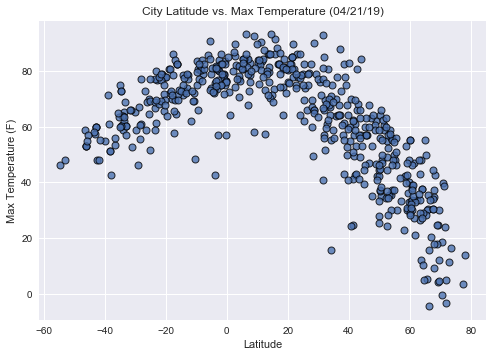

In [57]:
# Build scatter plot for latitude vs temperature
plt.scatter(citiesweather_df["Latitude"], 
            citiesweather_df["Temperature Max"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs Temperature (F).png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

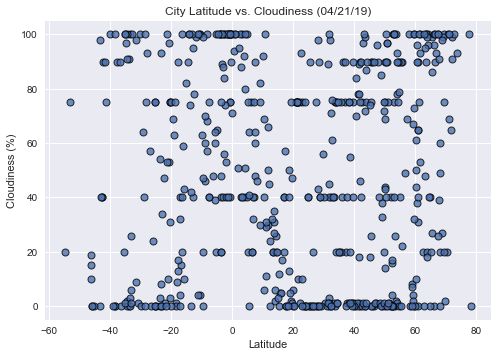

In [59]:
# Build the scatter plots for each city types
plt.scatter(citiesweather_df["Latitude"], 
            citiesweather_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("Latitude vs Cloudiness (%).png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

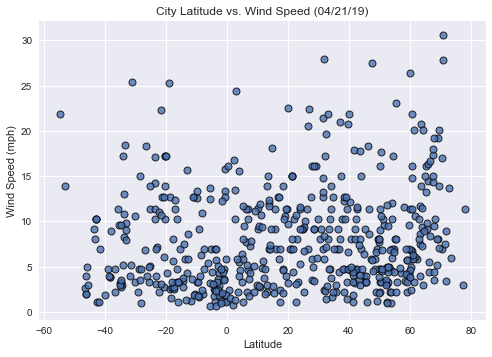

In [62]:
# Build the scatter plots for each city types
plt.scatter(citiesweather_df["Latitude"], 
            citiesweather_df["Wind speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs Wind Speed (MPH).png")

# Show plot
plt.show()

In [ ]:
# Latitude vs. Humidity

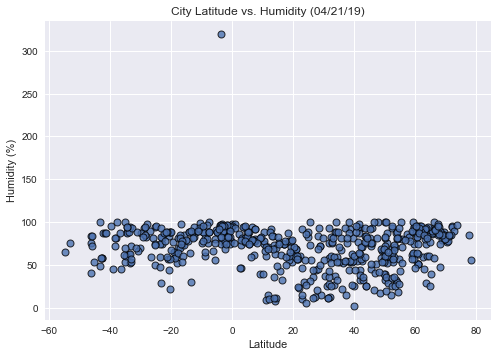

In [63]:
# Build the scatter plots for each city types
plt.scatter(citiesweather_df["Latitude"], 
            citiesweather_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("Latitude vs Humidity (%).png")

# Show plot
plt.show()